### Classification in Business

<center>
    <img src = 'images/uci_biz.png' />
</center>



------------


For this try-it, you are to explore some available datasets related to business applications of classification.  Using a dataset from the UCI Machine Learning Repository, scan datasets   under the subject area "BUSINESS" [link here](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=bus&numAtt=&numIns=&type=&sort=nameUp&view=table).  Find a dataset that looks interesting to you and decide how you could use Logistic Regression to help make a business decision using the data. 

In sharing your results, be sure to clearly describe the following:

- the dataset and its features
- the classification problem -- what are you classifying here?
- a business decision that can be supported using the results of the classification model

Share your summary on the appropriate discussion board for the activity. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, \
                            accuracy_score, recall_score, precision_score, precision_recall_curve
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config

In [45]:
# figure or diagram to visualize pipeline
set_config(display='diagram')

In [3]:
estore = pd.read_csv('data/e-shop clothing 2008.csv', sep=';')

In [4]:
estore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   year               165474 non-null  int64 
 1   month              165474 non-null  int64 
 2   day                165474 non-null  int64 
 3   order              165474 non-null  int64 
 4   country            165474 non-null  int64 
 5   session_id         165474 non-null  int64 
 6   main_category      165474 non-null  int64 
 7   clothing_model     165474 non-null  object
 8   color              165474 non-null  int64 
 9   location           165474 non-null  int64 
 10  model_photography  165474 non-null  int64 
 11  price              165474 non-null  int64 
 12  high_priced        165474 non-null  int64 
 13  page_number        165474 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 17.7+ MB


In [5]:
# assign numeric
pd.factorize(estore['clothing_model'])[1]

Index(['A13', 'A16', 'B4', 'B17', 'B8', 'C56', 'C57', 'P67', 'P82', 'B31',
       ...
       'P27', 'P24', 'A43', 'P31', 'P53', 'P45', 'P54', 'P28', 'P22', 'P79'],
      dtype='object', length=217)

In [6]:
estore.loc[:,'clothing_model'] = pd.factorize(estore['clothing_model'])[0]

In [7]:
estore.describe()

,year,month,day,order,country,session_id,main_category,clothing_model,color,location,model_photography,price,high_priced,page_number
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,81.960344,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,55.414158,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,38.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,75.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,126.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,216.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


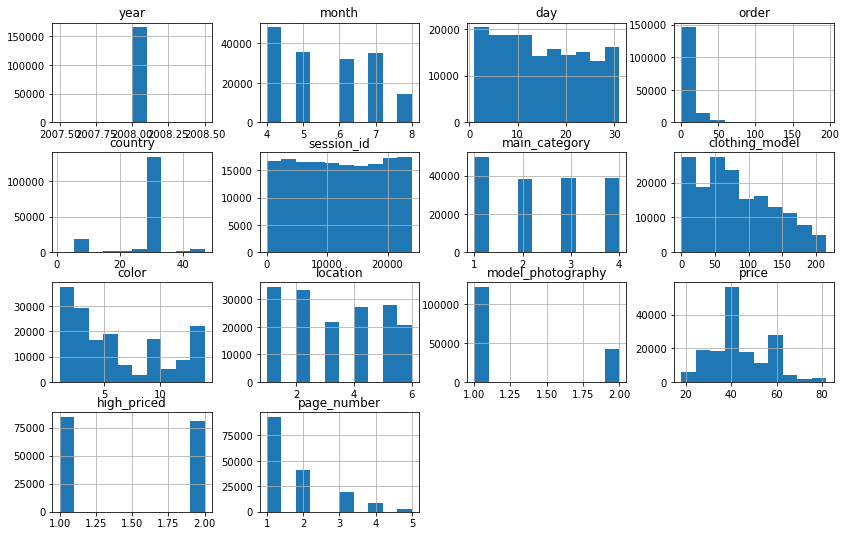

CPU times: user 1.1 s, sys: 27.4 ms, total: 1.13 s
Wall time: 1.13 s


In [8]:
%%time
# histograms
estore.hist(figsize = (14, 9))
plt.show()

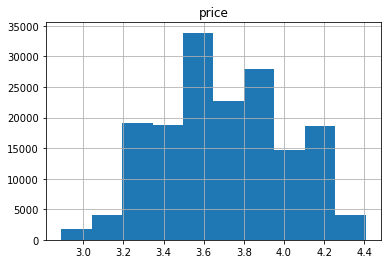

CPU times: user 119 ms, sys: 4.35 ms, total: 123 ms
Wall time: 121 ms


In [9]:
%%time
np.log(estore[['price']]).hist()
plt.show()

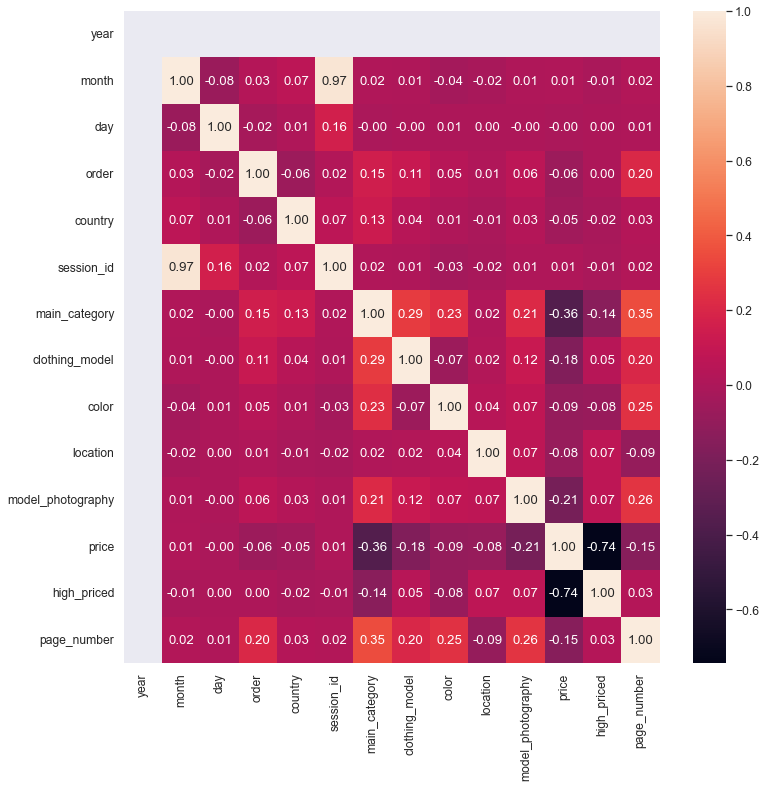

In [51]:
#heatmap
plt.subplots(figsize=(12,12))
sns.set(font_scale=1.1)
sns.heatmap(estore.corr(), annot=True, fmt='.2f')
plt.show()

In [11]:
estore

,year,month,day,order,country,session_id,main_category,clothing_model,color,location,model_photography,price,high_priced,page_number
0,2008,4,1,1,29,1,1,0,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,1,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,2,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,3,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,4,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,86,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,29,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,53,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,64,12,1,1,43,1,1


In [12]:
estore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   year               165474 non-null  int64
 1   month              165474 non-null  int64
 2   day                165474 non-null  int64
 3   order              165474 non-null  int64
 4   country            165474 non-null  int64
 5   session_id         165474 non-null  int64
 6   main_category      165474 non-null  int64
 7   clothing_model     165474 non-null  int64
 8   color              165474 non-null  int64
 9   location           165474 non-null  int64
 10  model_photography  165474 non-null  int64
 11  price              165474 non-null  int64
 12  high_priced        165474 non-null  int64
 13  page_number        165474 non-null  int64
dtypes: int64(14)
memory usage: 17.7 MB


No further cleaning is needed on the dataset, ready!

In [13]:
estore.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'main_category', 'clothing_model', 'color', 'location',
       'model_photography', 'price', 'high_priced', 'page_number'],
      dtype='object')

In [14]:
# separate independent variable - features - from target and split training and test datasets
X, y = estore.drop(['year', 'month', 'day', 'order', 'session_id','high_priced'], axis = 1), estore.high_priced
# Smoothen price by log
X.loc[:,'price'] = np.log(X['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 93, stratify = y)

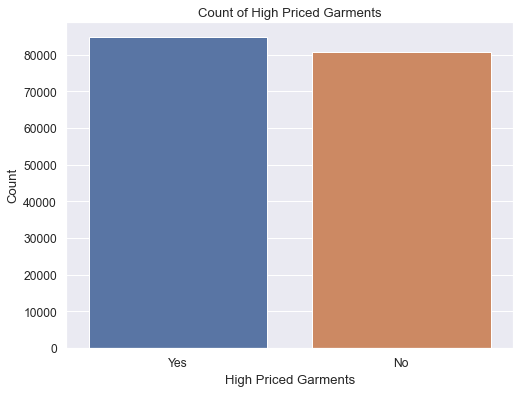

In [15]:
plt.subplots(figsize=(8,6))
splot = sns.countplot(data=estore, x = 'high_priced')
splot.set_xticklabels(['Yes', 'No'])
plt.xlabel('High Priced Garments')
plt.ylabel('Count')
plt.title('Count of High Priced Garments')
plt.show()

In [16]:
y.value_counts(normalize=True)

1    0.511833
2    0.488167
Name: high_priced, dtype: float64

In [17]:
y_train.value_counts(normalize=True)

1    0.511833
2    0.488167
Name: high_priced, dtype: float64

In [18]:
y_test.value_counts(normalize=True)

1    0.511833
2    0.488167
Name: high_priced, dtype: float64

In [44]:
# since there is no aplhanumeric columns, we can just scale and classify data, no transformation needed
# Note: n_neighbors=5 and weights='uniform' by default!
estore_pipeline = Pipeline([('scale', StandardScaler()),
                            ('knn', KNeighborsClassifier(n_neighbors=5, weights='distance'))])
estore_pipeline.fit(X_train, y_train)
estore_preds = estore_pipeline.predict(X_test)
estore_proba = estore_pipeline.predict_proba(X_test)
estore_pipeline

Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(weights='distance'))])

In [46]:
estore_pipeline

Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(weights='distance'))])

In [21]:
# adjust decision boundary
thresholds = np.arange(0, 1, .1)
# auc decision boundary
estore_db = pd.DataFrame(
    {'threshold':thresholds,
     'accuracy' :[accuracy_score(y_test, np.where(estore_proba[:, 1] >= t, 1, 0) ) for t in thresholds],
     'precision':[precision_score(y_test, np.where(estore_proba[:, 1] >= t, 1, 0),
                                  pos_label=1, zero_division=0, average='weighted') for t in thresholds],
     'recall'   :[recall_score(y_test, np.where(estore_proba[:, 1] >= t, 1, 0),
                               pos_label=1, zero_division=0, average='weighted') for t in thresholds]
    })

In [22]:
estore_db

,threshold,accuracy,precision,recall
0,0.0,0.511833,0.261973,0.511833
1,0.1,0.000073,0.000076,0.000073
2,0.2,0.000073,0.000076,0.000073
3,0.3,0.000073,0.000076,0.000073
4,0.4,0.000073,0.000076,0.000073
5,0.5,0.000024,0.000025,0.000024
6,0.6,0.000024,0.000025,0.000024
7,0.7,0.000024,0.000025,0.000024
8,0.8,0.000000,0.000000,0.000000
9,0.9,0.000000,0.000000,0.000000


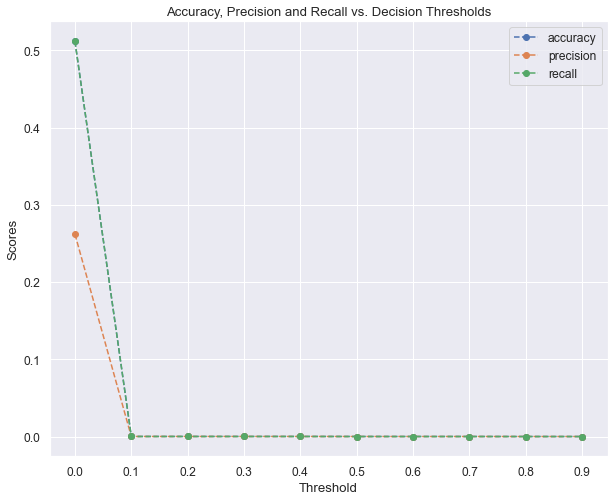

In [23]:
# plot 
plt.subplots(figsize=(10,8))
plt.plot(estore_db['threshold'], estore_db['accuracy'], '--o', label = 'accuracy')
plt.plot(estore_db['threshold'], estore_db['precision'], '--o', label = 'precision')
plt.plot(estore_db['threshold'], estore_db['recall'], '--o', label = 'recall')
#plt.axvline(x=0.45, color="black", label = 'intersection')
plt.xticks(thresholds)
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.title('Accuracy, Precision and Recall vs. Decision Thresholds')
plt.legend()
plt.grid(True)

[0.23966529 0.28576356 0.59224801 0.73391264 1.        ]


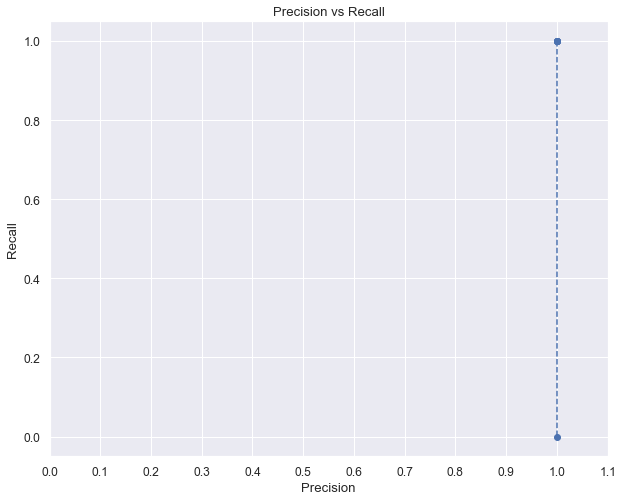

In [49]:
# Precision vs Recall
precision, recall, boundaries = precision_recall_curve(y_true = y_test,
                                                       probas_pred=estore_proba[:, 0], pos_label=1)
# 
print(boundaries[:5])
plt.subplots(figsize=(10,8))
plt.plot(precision, recall, '--o')
plt.xticks(np.arange(0, 1.2, .1))
plt.grid(True)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision vs Recall')
plt.show()

In [25]:
y_test.value_counts()

1    21174
2    20195
Name: high_priced, dtype: int64

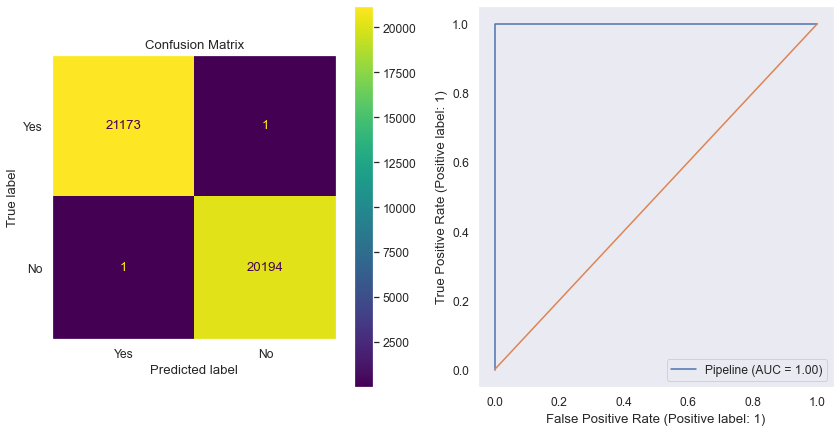

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (14, 7))
ConfusionMatrixDisplay.from_predictions(y_test, estore_preds, values_format='d',
                                        display_labels=['Yes', 'No'], ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].grid(False)
RocCurveDisplay.from_estimator(estore_pipeline, X_test, y_test, pos_label=1, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))
ax[1].grid()
plt.show()

In [27]:
# High_priced indices
y_test[y_test!=estore_preds], estore_preds[y_test!=estore_preds], estore_proba[y_test!=estore_preds]

(69978    2
 27960    1
 Name: high_priced, dtype: int64,
 array([1, 2]),
 array([[0.73391264, 0.26608736],
        [0.23966529, 0.76033471]]))

In [28]:
#X_test dataframe
X_test[y_test!=estore_preds]

,country,main_category,clothing_model,color,location,model_photography,price,page_number
69978,9,4,193,4,1,1,3.496508,2
27960,29,4,216,2,3,1,3.951244,5


In [29]:
estore_proba[y_test!=estore_preds]

array([[0.73391264, 0.26608736],
       [0.23966529, 0.76033471]])

In [30]:
# see all merchants in that category
X.query('main_category == 4 and clothing_model == 193 and location == 1 and model_photography == 1 and page_number == 2')

,country,main_category,clothing_model,color,location,model_photography,price,page_number
1095,29,4,193,4,1,1,3.496508,2
1845,29,4,193,4,1,1,3.496508,2
2853,29,4,193,4,1,1,3.496508,2
3123,29,4,193,4,1,1,3.496508,2
4038,29,4,193,4,1,1,3.496508,2
...,...,...,...,...,...,...,...,...
163203,29,4,193,4,1,1,3.496508,2
163811,29,4,193,4,1,1,3.496508,2
164804,29,4,193,4,1,1,3.496508,2
165319,29,4,193,4,1,1,3.496508,2


In [31]:
# see all merchants in that category
y[
   list(X.query('main_category == 4 and clothing_model == 193 and location == 1 and model_photography == 1 and page_number == 2').index)
].value_counts()

2    297
Name: high_priced, dtype: int64

In [32]:
estore.query('main_category == 4 and price == 52')

,year,month,day,order,country,session_id,main_category,clothing_model,color,location,model_photography,price,high_priced,page_number
27946,2008,4,16,30,29,4081,4,215,12,2,1,52,1,2
27960,2008,4,16,44,29,4081,4,216,2,3,1,52,1,5
35210,2008,4,21,14,12,5031,4,215,12,2,1,52,1,2
48222,2008,5,1,7,42,6948,4,216,2,3,1,52,1,5


In [33]:
estore.query('main_category == 4').median(), estore.query('main_category == 4').mean()

(year                  2008.0
 month                    6.0
 day                     14.0
 order                    8.0
 country                 29.0
 session_id           12623.0
 main_category            4.0
 clothing_model         129.0
 color                    4.0
 location                 3.0
 model_photography        1.0
 price                   38.0
 high_priced              1.0
 page_number              2.0
 dtype: float64,
 year                  2008.000000
 month                    5.653393
 day                     14.479418
 order                   12.806179
 country                 28.909335
 session_id           12382.891914
 main_category            4.000000
 clothing_model         112.457326
 color                    5.667794
 location                 3.221436
 model_photography        1.418432
 price                   36.233799
 high_priced              1.458100
 page_number              2.191008
 dtype: float64)

In [34]:
# see all merchants in that category
y[
   list(X.query('main_category == 4 and clothing_model == 216 and location == 3 and model_photography == 1 and page_number == 5').index)
].value_counts()

1    2
Name: high_priced, dtype: int64

In [35]:
#transformed_features = lgr_pipe.named_steps['transformer'].get_feature_names_out(X_test.columns)
#transformed_features = [str.split(x, sep = '__')[1] for x in transformed_features]
#-----
feature_names = estore_pipeline.named_steps['scale'].get_feature_names_out(X_test.columns)
feature_names


array(['country', 'main_category', 'clothing_model', 'color', 'location',
       'model_photography', 'price', 'page_number'], dtype=object)

In [36]:
estore_pipeline.predict_proba(X_test)[:,0]

array([0., 1., 1., ..., 1., 1., 0.])

In [37]:
estore_pipeline[:-1].get_feature_names_out()

array(['country', 'main_category', 'clothing_model', 'color', 'location',
       'model_photography', 'price', 'page_number'], dtype=object)

In [38]:
estore_pipeline['scale'].get_feature_names_out()

array(['country', 'main_category', 'clothing_model', 'color', 'location',
       'model_photography', 'price', 'page_number'], dtype=object)

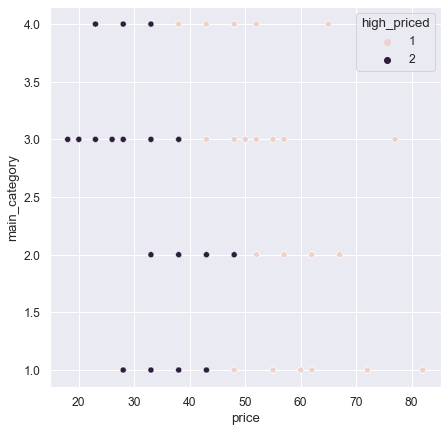

In [50]:
# plot all
plt.subplots(figsize=(7,7))
sns.scatterplot(data = estore, x = 'price', y = 'main_category', hue = y)
plt.show()

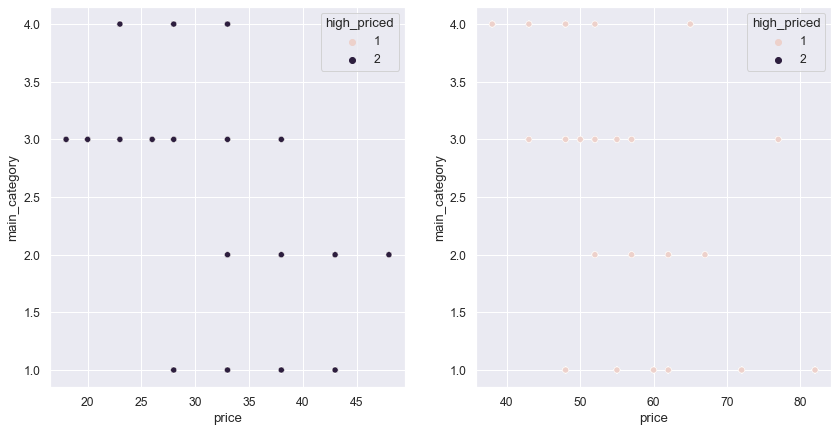

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
sns.scatterplot(data = estore[estore['high_priced'] == 2], x = 'price', y = 'main_category', hue = y, ax=ax[0])
#plt.xlim(10, 90)
sns.scatterplot(data = estore[estore['high_priced'] == 1], x = 'price', y = 'main_category', hue = y, ax=ax[1])
#plt.xlim(10, 90)
plt.show()

In [41]:
# %%time
# params = {'knn__n_neighbors': range(1, 16, 2), 'knn__weights':['uniform', 'distance']}
# for scorer in ['accuracy', 'precision', 'recall', 'roc_auc']:
#     knn_grid = GridSearchCV(estore_pipeline, param_grid = params, scoring=scorer)
#     knn_grid.fit(X_train, y_train)
#     best_k = knn_grid.best_params_
#     print(scorer + ':', best_k)
# # accuracy: {'knn__n_neighbors': 1, 'knn__weights': 'uniform'}
# # precision: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}
# # recall: {'knn__n_neighbors': 1, 'knn__weights': 'uniform'}
# # roc_auc: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
# # CPU times: user 5min 13s, sys: 2.53 s, total: 5min 15s
# # Wall time: 5min 15s